In [ ]:
# importing python packages
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/Soot3/testing/master/cell2celltrain.csv",engine='python', encoding='utf-8', error_bad_lines=False)

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [ ]:
# Nulls are less than 3% of the entire dataset
train.dropna(inplace=True)

In [ ]:
# Significantly less churned customers
train['Churn'].value_counts(normalize=True)

No     0.71368
Yes    0.28632
Name: Churn, dtype: float64

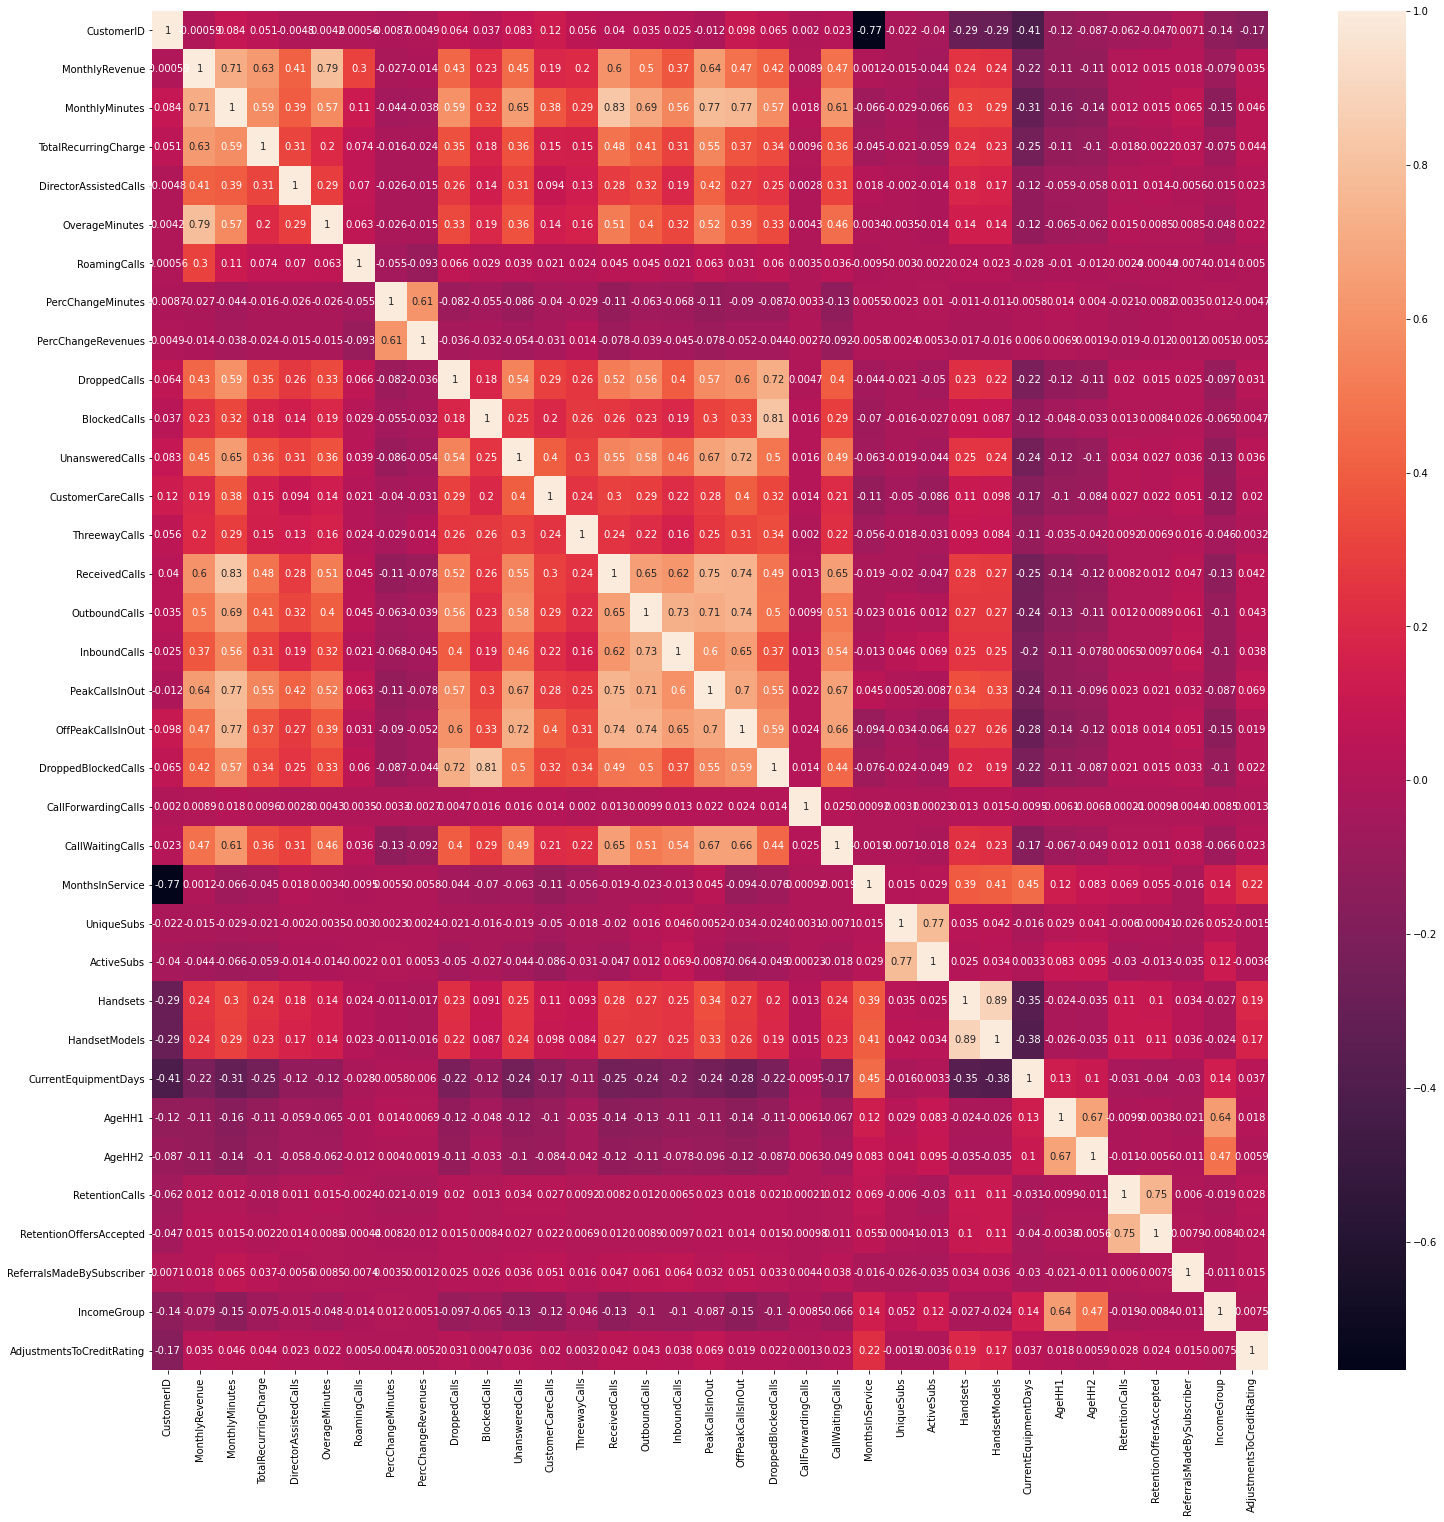

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(train.corr() , annot =True)

In [ ]:
# Checking for multicollinerity with a threshold of 0.7
features = set()
matrix=train.corr()

for i in range(len(matrix.columns)):
    for j in range(i):
        if abs(matrix.iloc[i,j]) >=0.7:
            colname = matrix.columns[i]
            features.add(colname)
    
print(features)

{'OverageMinutes', 'MonthlyMinutes', 'RetentionOffersAccepted', 'HandsetModels', 'OffPeakCallsInOut', 'ReceivedCalls', 'ActiveSubs', 'DroppedBlockedCalls', 'InboundCalls', 'PeakCallsInOut', 'MonthsInService'}


In [ ]:
# Dropping these features based on their correlations with other variables
features1= ['ActiveSubs','DroppedBlockedCalls','HandsetModels','OutboundCalls','OffPeakCallsInOut','OverageMinutes','PeakCallsInOut','ReceivedCalls','RetentionOffersAccepted','CustomerID']
train.drop(columns=features1, inplace=True)


In [ ]:
# Imputting the mean price instead of Unknown
train['HandsetPrice'] = train['HandsetPrice'].replace('Unknown',82.24)
train['HandsetPrice']=train['HandsetPrice'].astype(float)
train['HandsetPrice'].dtype

dtype('float64')

In [ ]:
# One Hot Encoding for Nominal variables
dum = pd.get_dummies(train[['Occupation', 'MaritalStatus']], drop_first=True)
dum.head()

,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Label Encoding for Ordinal variables
objects = train.select_dtypes('object').columns.to_list()
le = preprocessing.LabelEncoder()
train[objects] = train[objects].apply(le.fit_transform)
train = pd.concat([train,dum], axis = 1)
train.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,InboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ServiceArea,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,1,24.00,219.0,22.0,0.25,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,0.0,0.0,0.3,61,2,655,2.0,361.0,62.0,0.0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,4,0,0,30.00,1,0,2,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,16.99,10.0,17.0,0.00,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,58,1,607,2.0,1504.0,40.0,42.0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,5,0,0,30.00,0,3,2,4,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,38.00,8.0,38.0,0.00,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,1,349,1.0,1812.0,26.0,26.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,6,0,0,82.24,0,2,3,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,82.28,1312.0,75.0,1.24,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,147.0,0.0,22.7,59,2,607,9.0,458.0,30.0,0.0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,6,0,0,10.00,0,3,0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,560,4.0,852.0,46.0,54.0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,9,0,1,10.00,0,0,0,4,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
# selecting predictor features, 
x = train.drop(columns=['Churn','NewCellphoneUser','HandsetRefurbished','ChildrenInHH','NotNewCellphoneUser','TruckOwner','OwnsComputer','HandsetWebCapable','RespondsToMailOffers','Homeownership','BuysViaMailOrder',
 'HasCreditCard',
 'RVOwner',
 'ReferralsMadeBySubscriber',
 'NonUSTravel', 
 'RetentionCalls',
 'AdjustmentsToCreditRating',
 'MadeCallToRetentionTeam',
 'OwnsMotorcycle',
 'OptOutMailings',
 'CallForwardingCalls', 'CreditRating', 'Occupation', 'MaritalStatus'])
# target labels
y = train['Churn']

In [ ]:
# using the Robust Scaler because of the outliers in our dataset
scaler = preprocessing.RobustScaler()
X = scaler.fit_transform(x.astype(float))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [ ]:
print('Train set: ', X_train.shape, Y_train.shape)
print('Test set: ', X_test.shape, Y_test.shape)

Train set:  (34826, 39) (34826,)
Test set:  (14926, 39) (14926,)


In [ ]:
rfcla = RandomForestClassifier(n_estimators=78,random_state=9,n_jobs=27,max_features= 'auto') 

rfcla.fit(X_train, Y_train)

Y_pred = rfcla.predict(X_test)

In [ ]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.7137210237170039


In [ ]:
importance = rfcla.feature_importances_
lis = []
# summarize feature importance
for i,v in enumerate(importance):
    lis.append(v)

In [ ]:
dic = {"Features":x.columns, 'Importance':lis}
df = pd.DataFrame(dic)

Text(0.5, 1.0, 'Feature Importance')

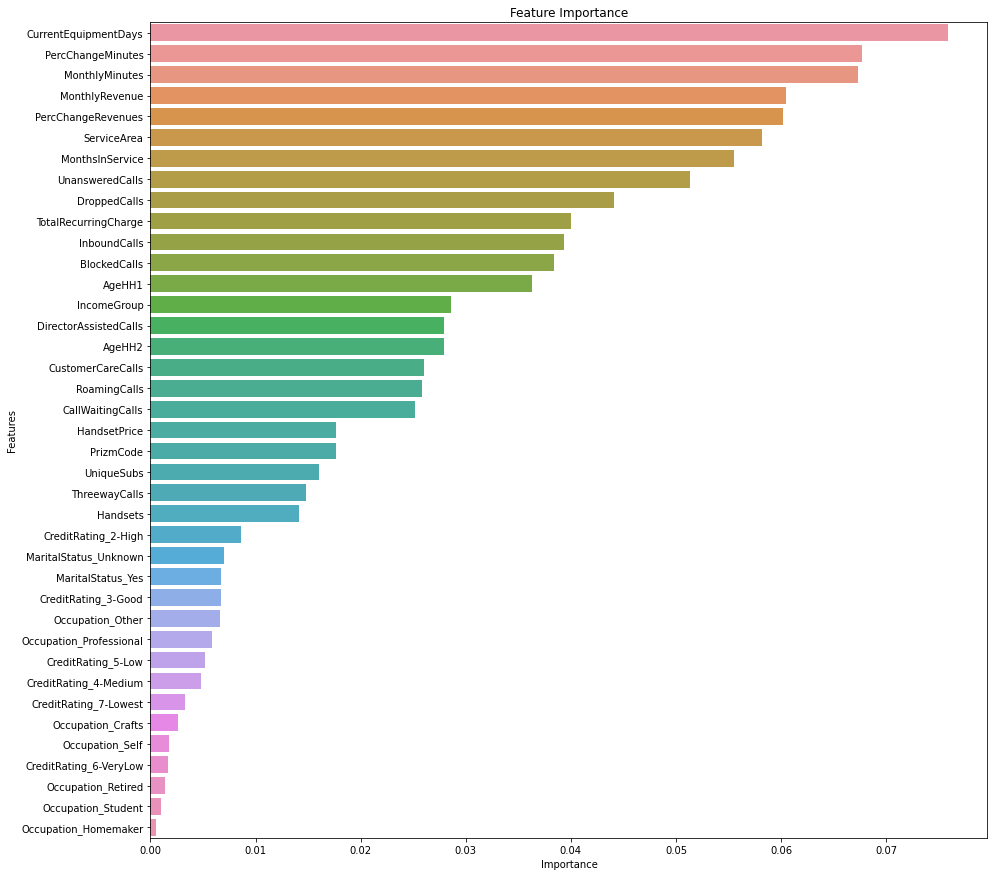

In [ ]:
plo=df.sort_values('Importance', ascending=False)
plt.subplots(1,figsize=(15,15))
sns.barplot(data=plo, y='Features', x='Importance').set_title('Feature Importance')

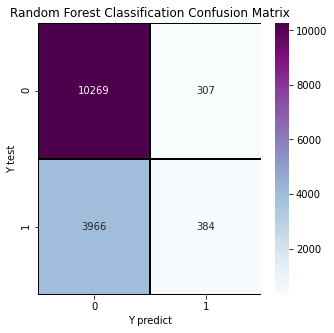

In [ ]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
print(classification_report(Y_test, Y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.72      0.97      0.83     10576
         Yes       0.56      0.09      0.15      4350

    accuracy                           0.71     14926
   macro avg       0.64      0.53      0.49     14926
weighted avg       0.67      0.71      0.63     14926

